In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error


**Load and Explore the Data**


In [3]:
# Load the dataset
df = pd.read_csv('ToyotaCorolla - MLR.csv')  # Adjust the filename/path as necessary

# Display the first few rows
print(df.head())

# Summary statistics
print(df.describe())

# Checking for null values
print(df.isnull().sum())

# Data types and basic info
print(df.info())


   Price  Age_08_04     KM Fuel_Type  HP  Automatic    cc  Doors  Cylinders  \
0  13500         23  46986    Diesel  90          0  2000      3          4   
1  13750         23  72937    Diesel  90          0  2000      3          4   
2  13950         24  41711    Diesel  90          0  2000      3          4   
3  14950         26  48000    Diesel  90          0  2000      3          4   
4  13750         30  38500    Diesel  90          0  2000      3          4   

   Gears  Weight  
0      5    1165  
1      5    1165  
2      5    1165  
3      5    1165  
4      5    1170  
              Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.

**Visualizations and Correlations**

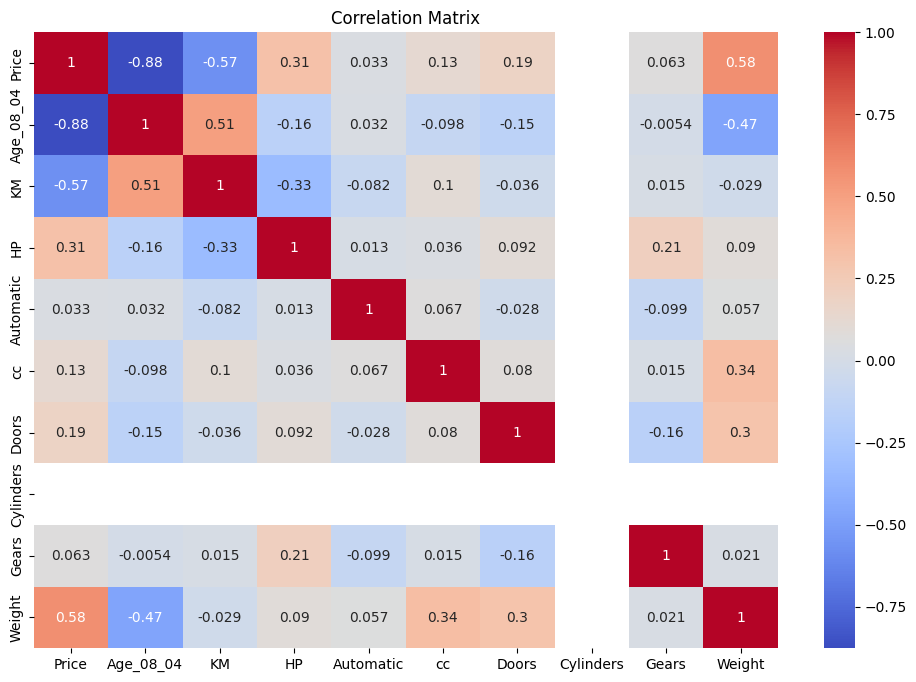

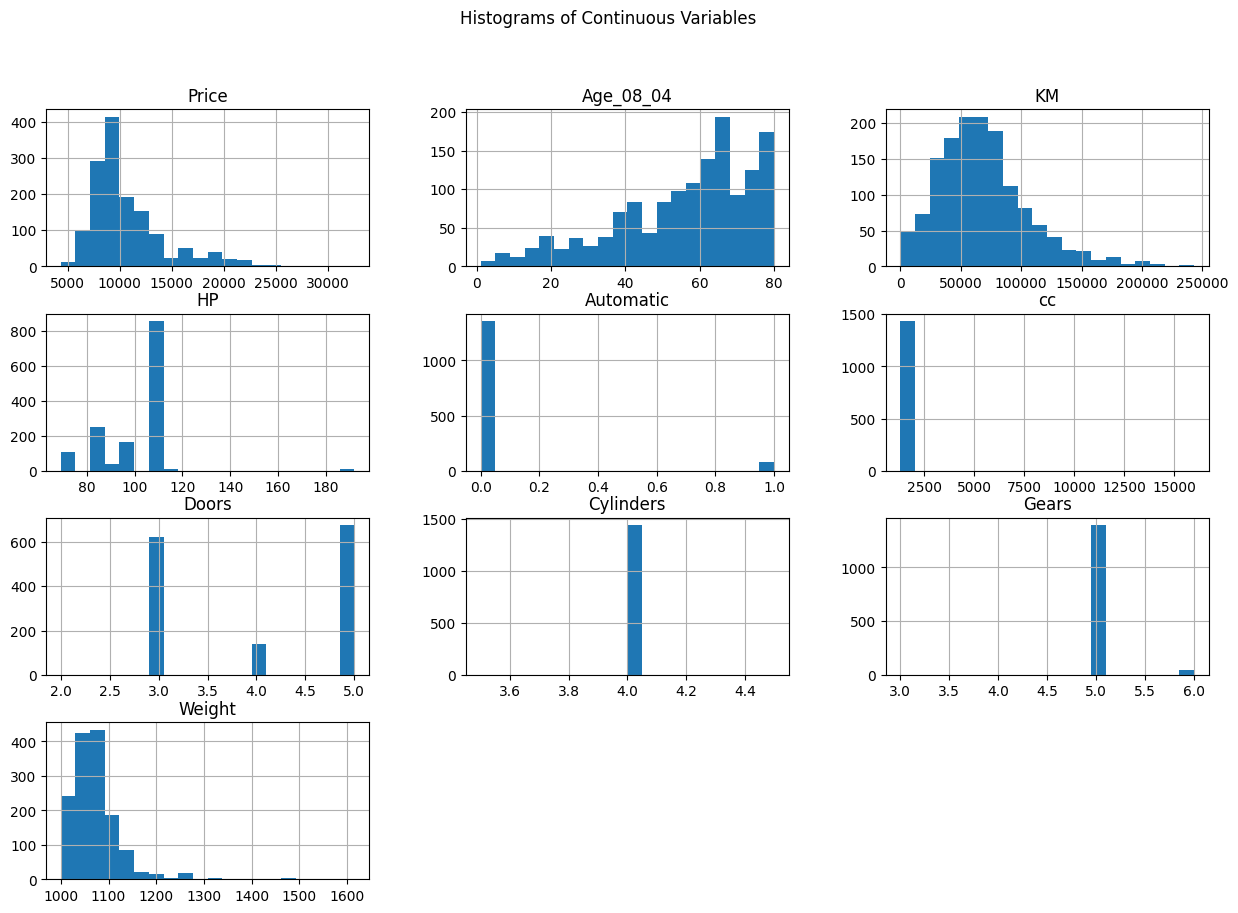

C:\Users\dhivya.dharani\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


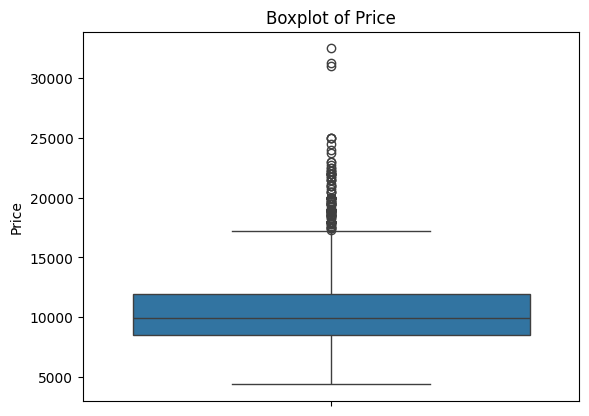

In [5]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only = True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Histograms for continuous variables
df.hist(bins=20, figsize=(15,10))
plt.suptitle("Histograms of Continuous Variables")
plt.show()

# Boxplot to identify outliers in target variable
sns.boxplot(df['Price'])
plt.title("Boxplot of Price")
plt.show()


**Preprocessing**

In [10]:
# One-hot encoding categorical variables
# df = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)

# Dropping any irrelevant columns if necessary (e.g., ID column)
# df = df.drop(['ID'], axis=1)

# Separate features and target variable
X = df.drop('Price', axis=1)
y = df['Price']

# Standardize the numerical features
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


**Train-Test Split**

In [11]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Building Multiple Linear Regression Models**

***Model 1: Baseline Model***

In [12]:
# Baseline Model
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)

# Coefficients
print("Baseline Model Coefficients:")
print(pd.DataFrame(baseline_model.coef_, X.columns, columns=["Coefficient"]))

# Predictions
y_pred_baseline = baseline_model.predict(X_test)

# Evaluation
r2_baseline = r2_score(y_test, y_pred_baseline)
mae_baseline = mean_absolute_error(y_test, y_pred_baseline)
rmse_baseline = mean_squared_error(y_test, y_pred_baseline, squared=False)

print(f"Baseline Model - R²: {r2_baseline}, MAE: {mae_baseline}, RMSE: {rmse_baseline}")


Baseline Model Coefficients:
                   Coefficient
Age_08_04        -2.246662e+03
KM               -6.085706e+02
HP                2.102533e+02
Automatic         3.413608e+01
cc               -1.288507e+01
Doors            -5.743684e+01
Cylinders         1.421085e-13
Gears             1.039463e+02
Weight            1.362139e+03
Fuel_Type_Diesel -2.127088e+01
Fuel_Type_Petrol  4.451027e+02
Baseline Model - R²: 0.834888804061108, MAE: 990.887273919397, RMSE: 1484.2654153296526


C:\Users\dhivya.dharani\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


***Model 2: Reduced Model (using top correlated features)***

In [14]:
# Select only the top correlated features for a reduced model
top_features = ['Age_08_04', 'KM', 'HP', 'Cylinders', 'Weight']  # Adjust based on your EDA results
X_train_reduced = X_train[top_features]
X_test_reduced = X_test[top_features]

reduced_model = LinearRegression()
reduced_model.fit(X_train_reduced, y_train)

# Predictions
y_pred_reduced = reduced_model.predict(X_test_reduced)

# Evaluation
r2_reduced = r2_score(y_test, y_pred_reduced)
mae_reduced = mean_absolute_error(y_test, y_pred_reduced)
rmse_reduced = mean_squared_error(y_test, y_pred_reduced, squared=False)

print(f"Reduced Model - R²: {r2_reduced}, MAE: {mae_reduced}, RMSE: {rmse_reduced}")


Reduced Model - R²: 0.8506068681500834, MAE: 1001.2017466055833, RMSE: 1411.8502091131113


C:\Users\dhivya.dharani\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


***Model 3: Model with Interaction Terms***

In [15]:
# Adding an interaction term, e.g., between Age and KM
X_train_interaction = X_train.copy()
X_test_interaction = X_test.copy()
X_train_interaction['Age_KM'] = X_train['Age_08_04'] * X_train['KM']
X_test_interaction['Age_KM'] = X_test['Age_08_04'] * X_test['KM']

interaction_model = LinearRegression()
interaction_model.fit(X_train_interaction, y_train)

# Predictions
y_pred_interaction = interaction_model.predict(X_test_interaction)

# Evaluation
r2_interaction = r2_score(y_test, y_pred_interaction)
mae_interaction = mean_absolute_error(y_test, y_pred_interaction)
rmse_interaction = mean_squared_error(y_test, y_pred_interaction, squared=False)

print(f"Interaction Model - R²: {r2_interaction}, MAE: {mae_interaction}, RMSE: {rmse_interaction}")


Interaction Model - R²: 0.8621657410005825, MAE: 940.7921322407282, RMSE: 1356.1317831454758


C:\Users\dhivya.dharani\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


**Lasso and Ridge Regression**

***Lasso Regression***

In [16]:
# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Predictions
y_pred_lasso = lasso.predict(X_test)

# Evaluation
r2_lasso = r2_score(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
rmse_lasso = mean_squared_error(y_test, y_pred_lasso, squared=False)

print(f"Lasso Regression - R²: {r2_lasso}, MAE: {mae_lasso}, RMSE: {rmse_lasso}")


Lasso Regression - R²: 0.8349119754675463, MAE: 990.9001017177329, RMSE: 1484.1612621141912


C:\Users\dhivya.dharani\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


***Ridge Regression***

In [17]:
# Ridge Regression
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)

# Predictions
y_pred_ridge = ridge.predict(X_test)

# Evaluation
r2_ridge = r2_score(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)

print(f"Ridge Regression - R²: {r2_ridge}, MAE: {mae_ridge}, RMSE: {rmse_ridge}")


Ridge Regression - R²: 0.8349066452386908, MAE: 990.8852174455266, RMSE: 1484.185221621107


C:\Users\dhivya.dharani\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


**Conclusion :**

***R²: The Interaction Model achieves the highest R² at 0.862, indicating that it explains 86.2% of the variance in Price, better than the other models.***

***MAE and RMSE: The Interaction Model has the lowest MAE and RMSE, meaning it is more accurate on average and has smaller prediction errors, especially compared to the Baseline and Regularized (Lasso and Ridge) models.***

Interview Questions:
1.What is Normalization & Standardization and how is it helpful?

Normalization and standardization are two common data preprocessing techniques in machine learning and data analysis. Both of these techniques adjust the range or distribution of values in your dataset, but they do so in slightly different ways. 

Normalization :

Normalization rescales the values of a dataset so that they fall within a specific range, often between 0 and 1, or sometimes between -1 and 1.

**Benefits of Normalization :**

Scale Consistency: Normalization is useful when your dataset has different units or varying ranges (e.g., income in dollars vs. age in years).

Improves Model Convergence: For certain machine learning algorithms (e.g., neural networks), normalization helps the model converge more quickly by stabilizing the learning process.

Distance-Based Models: Models like k-Nearest Neighbors (k-NN) and support vector machines (SVM) rely on distance measurements. Normalization helps ensure that features are on the same scale, preventing features with larger values from dominating the distance calculations.

2.What techniques can be used to address multicollinearity in multiple linear regression?

Standardization transforms data so that it has a mean of 0 and a standard deviation of 1

**Benefits of Standardization:**

Normal Distribution: Standardization is helpful when the data is normally distributed (or close to it), as it can center the data and remove skew.

Uniform Variance: For models sensitive to the scale of variance (e.g., linear regression, principal component analysis, logistic regression), standardizing ensures that all features contribute equally to the model.

Gaussian Assumptions: Many algorithms (e.g., linear models) assume a Gaussian (normal) distribution, and standardization often improves performance by better aligning the data with this assumption.
